In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [88]:
df = pd.read_csv('./new_Base_CDM_balanced_V2.csv', sep=';')

# rename the columns
df.rename(columns={'X1': 'cor_sales_in_vol',
          'X2': 'cor_sales_in_val', 'X3': 'CA_mag', 'X4': 'value', 'X5': 'ENSEIGNE',
                   'X6': 'VenteConv', 'X7': 'Feature'}, inplace=True)
# remove the first row
df = df.iloc[1:]

print(df.groupby('Y').size())
df.head()


Y
Displ       12782
No_Displ    13000
dtype: int64


,Y,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat
5,No_Displ,5,62.1,142602,50,CORA,250,No_Feat


In [89]:
# write a function that takes a list of features and parses their values into floats
def parse_features(features):
    for feature in features:
        df[feature] = df[feature].str.replace(',', '.').astype(float)
    return df

In [90]:
numerical_features = ["cor_sales_in_vol", "cor_sales_in_val",
                      "CA_mag", "value", "VenteConv"]
categorical_features = ["ENSEIGNE", "Feature"]


In [91]:
nums = parse_features(numerical_features)
df = nums
df.head()

,Y,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,No_Displ,2.0,20.20,47400.0,36.0,CORA,72.0,No_Feat
2,No_Displ,2.0,11.90,62000.0,24.0,LECLERC,48.0,No_Feat
3,No_Displ,8.0,29.52,60661.0,60.0,AUCHAN,480.0,No_Feat
4,No_Displ,2.0,16.20,59677.0,19.0,CARREFOUR,38.0,No_Feat
5,No_Displ,5.0,62.10,142602.0,50.0,CORA,250.0,No_Feat


In [93]:
# write a function to look for missing values
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
                                                              "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns


missing_values_table(df)


Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [95]:
# write function to plot side by side scatter plots of the features
def plot_scatter(df, features):
    for feature in features:
        df.plot.scatter(feature, 'Y', figsize=(5, 5))
        plt.show()

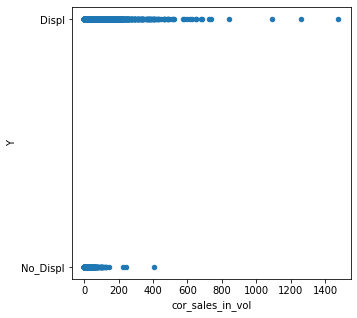

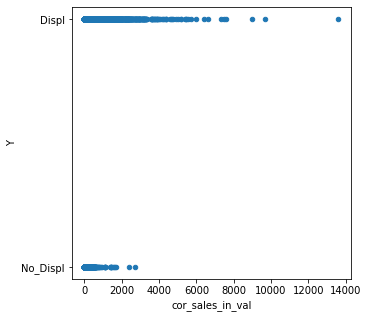

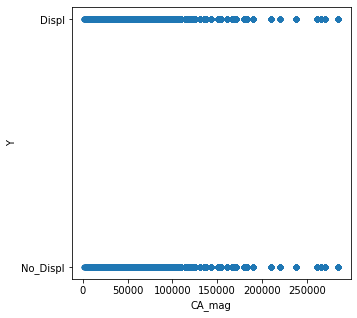

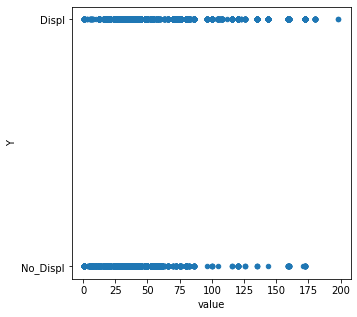

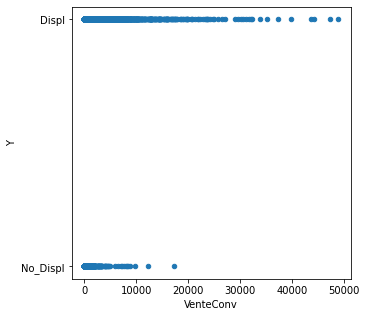

In [96]:
plot_scatter(df, numerical_features)


In [97]:
# write a function that deletes data points outside 3 standart deviations of the mean
def delete_outliers(df, features):
    for feature in features:
        mean = df[feature].mean()
        std = df[feature].std()
        df = df[(df[feature] > mean - 3 * std) & (df[feature] < mean + 3 * std)]
    return df


df = delete_outliers(df, numerical_features)


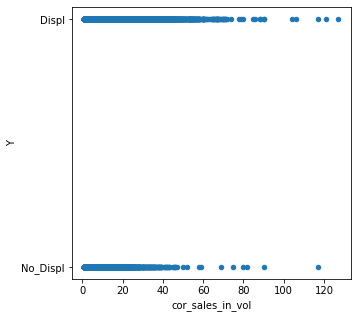

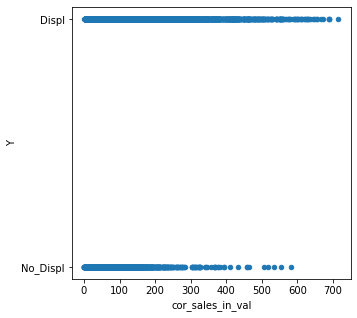

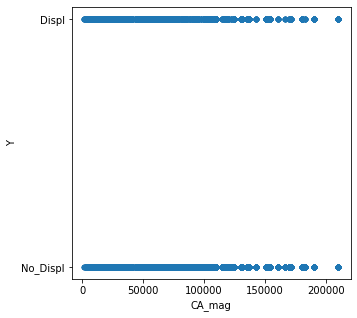

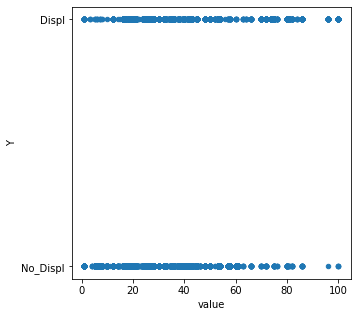

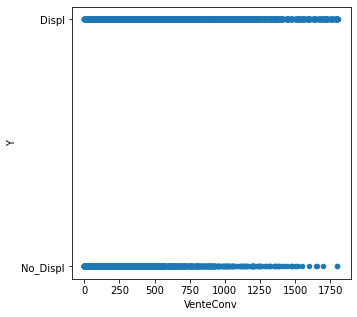

In [99]:
plot_scatter(df, numerical_features)


In [100]:
# write a function that Scale the continuous variables so that they are on the same scale
def scale_features(df, features):
    for feature in features:
        df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()
    return df


# scaling the values
df = scale_features(df, numerical_features)


In [102]:
# write a function to label encode the target variable (Y) if its value == 'No_Displ' then 0 else 1
def label_encode(df):
    df['Y'] = np.where(df['Y'] == 'No_Displ', 0, 1)
    return df


label_encode(df)

In [112]:
mean_target_by_enseigne = df.groupby('ENSEIGNE')['Y'].mean()
df['ENSEIGNE'] = df['ENSEIGNE'].map(mean_target_by_enseigne)
df.head()


In [114]:
# write a function to label encode the target variable (Y) if its value == 'No_Displ' then 0 else 1
def label_encode_Feature(df):
    df['Feature'] = np.where(df['Feature'] == 'No_Feat', 0, 1)
    return df


label_encode_Feature(df)


,Y,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,0,-0.523155,-0.458692,-0.201180,0.146677,0.338037,-0.507839,0
2,0,-0.523155,-0.559977,0.125993,-0.648938,0.405287,-0.583034,0
3,0,0.105097,-0.344961,0.095987,1.737906,0.321567,0.770479,0
4,0,-0.523155,-0.507504,0.073937,-0.980444,0.429692,-0.614366,0
5,0,-0.209029,0.052610,1.932210,1.074894,0.338037,0.049859,0
...,...,...,...,...,...,...,...,...
25778,1,-0.627864,-0.574620,-1.172994,0.411882,0.478940,-0.608100,0
25779,1,-0.209029,-0.284801,-1.172994,0.080376,0.478940,-0.185126,0
25780,1,0.523932,0.292031,-1.172994,0.080376,0.478940,0.582491,0
25781,1,-0.209029,-0.342154,-1.172994,-0.648938,0.478940,-0.357449,0


In [ ]:
# TODO : Entropy-based MDLPC: